data = https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

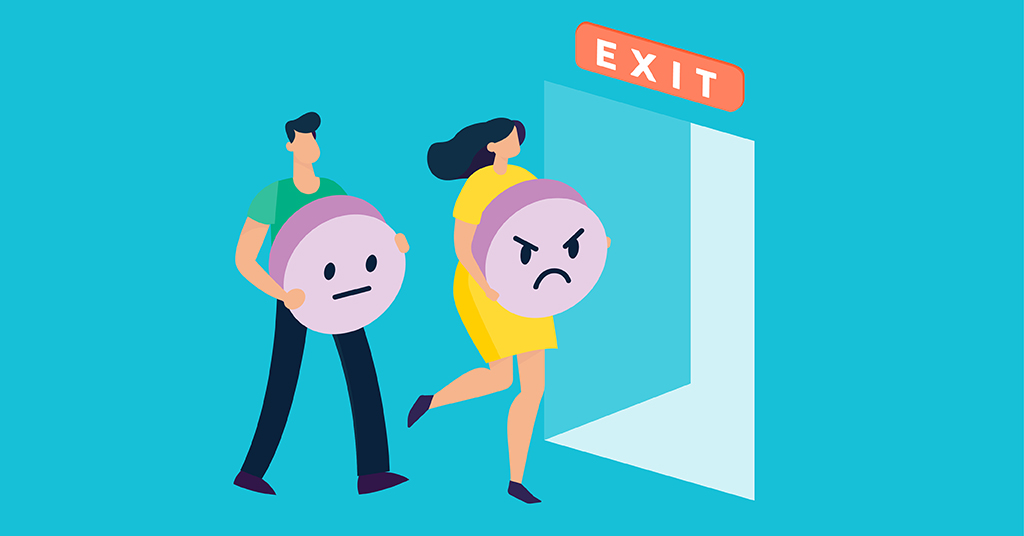

### ⭐ 분석 목적 : 회사 이탈 예정 고객을 놓치지 않기 위한 전략 수립⭐

- #### 데이터 (5630 rows, by E-Commerce company)

>1. CustomerID : Unique customer ID (고객 ID)

>2. Churn : Churn Flag (이탈 플래그) / ⭐ target

>3. Tenure : Tenure of customer in organization (고객의 가입기간)

>4. PreferredLoginDevice : Preferred login device of customer (고객이 선호하는 로그인)

>5. CityTier : City tier (도시 등급)

>6. WarehouseToHome : Distance in between warehouse to home of customer (창고에서 고객 집까지의 거리)

>7. PreferredPaymentMode : Preferred payment method of customer (고객이 선호하는 결제수단)

>8. Gender : Gender of customer (고객의 성별)

>9. HourSpendOnApp : Number of hours spend on mobile application or website (모바일 앱 또는 웹사이트에서 보낸 시간)

>10. NumberOfDeviceRegistered : Total number of deceives is registered on particular customer (등록된 장치 수)

>11. PreferedOrderCat : Preferred order category of customer in last month (선호 주문 카테고리)

>12. SatisfactionScore : Satisfactory score of customer on service (서비스 만족도 점수)

>13. MaritalStatus : Marital status of customer (고객의 결혼 여부)

>14. NumberOfAddress : Total number of added added on particular customer (주소 수)

>15. Complain : Any complaint has been raised in last month (지난달 컴플레인)

>16. OrderAmountHikeFromlastYear : Percentage increases in order from last year (전 년도 대비 주문량 인상 퍼센트)

>17. CouponUsed : Total number of coupon has been used in last month (지난 달에 사용한 총 쿠폰 수)

>18. OrderCount : Total number of orders has been places in last month (지난 달에 이루어진 총 주문 수)

>19. DaySinceLastOrder : Day Since last order by customer (마지막 주문 일)

>20. CashbackAmount : Average cashback in last month (지난 달 평균 캐쉬백)

-------------------------------------------------------------------------------------------------------

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [4]:
from google.colab import drive  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df = pd.read_excel('/content/gdrive/MyDrive/E_Commerce_Dataset.xlsx', sheet_name = 'E Comm')

In [6]:
df.head()

# mobile phone이랑 phone이랑 왜 따로..?

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.shape

(5630, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

✔ 중복치 확인

In [9]:
df.duplicated().sum()

0

✔ 결측치 확인

In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
(df.isnull().sum()).sum()

1856

✔ int, float, object로 이루어져 있음

✔ 결측치 있음 (1856) --> 데이터 수가 많지 않기 때문에 drop하기보다는 다른 방법을 찾는 것이 좋을 것 같음

-------------------------------------------------------------------------------------------------------


> ### ✔  Exploratory Data Analysis (EDA)

#### Gender

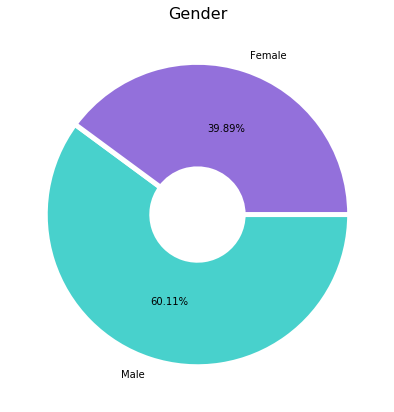

In [12]:
# Gender
# 0 -> No(유지), 1 -> Yes(이탈)

colors = ['mediumturquoise', 'mediumpurple']
plt.figure(figsize=(7,7))

labels = ("Male", "Female")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['Gender'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Gender", fontsize=16)

plt.show()

남 : 60% / 여 : 40%

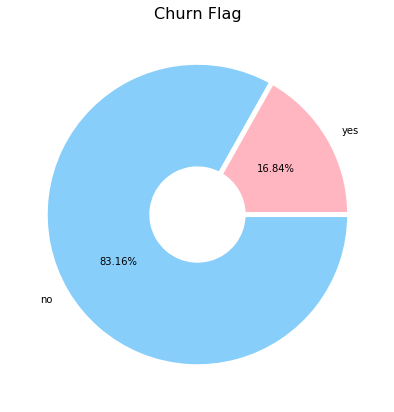

In [13]:
# churn
# 0 -> No(유지), 1 -> Yes(이탈)

colors = ['lightskyblue', 'lightpink']
plt.figure(figsize=(7,7))

labels = ("no", "yes")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['Churn'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Churn Flag", fontsize=16)

plt.show()

- ✔ 0 -> No (유지)  83.16%

- ✔ 1 -> Yes (이탈)  16.84%

> - #### Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

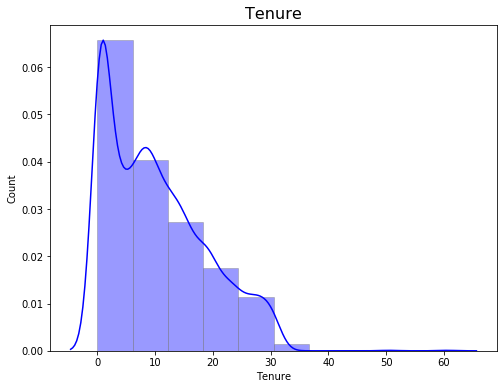

In [14]:
# Tenure

plt.figure(figsize=(8,6))
ax = sns.distplot(df['Tenure'],
                  hist=True,
                  kde=True,
                  bins=10,
                  color='blue',
                  hist_kws={'edgecolor': 'gray'}
                  )
ax.set_xlabel('Tenure')
ax.set_ylabel('Count')
ax.set_title('Tenure', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


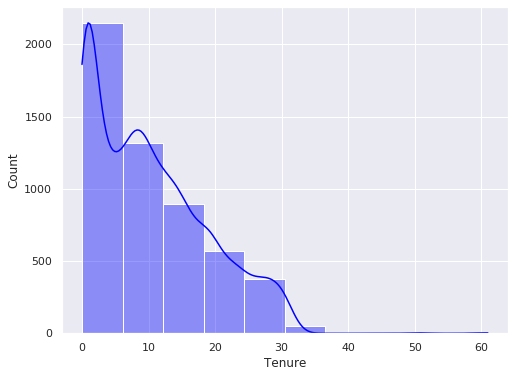

In [15]:
# Tenure

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='Tenure', 
             kde=True, 
             bins=10, 
             data=df, 
             color='blue', 
             alpha = 0.4)
plt.show()

- 근무기간 0 ~ 5년이 2000개 이상으로 가장 많았음

> - #### OrderCount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

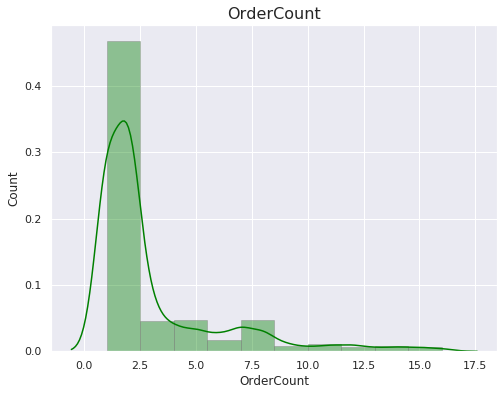

In [16]:
# OrderCount

plt.figure(figsize=(8,6))
ax = sns.distplot(df['OrderCount'],
                  hist=True,
                  kde=True,
                  bins=10,
                  color='green',
                  hist_kws={'edgecolor': 'gray'}
                  )
ax.set_xlabel('OrderCount')
ax.set_ylabel('Count')
ax.set_title('OrderCount', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


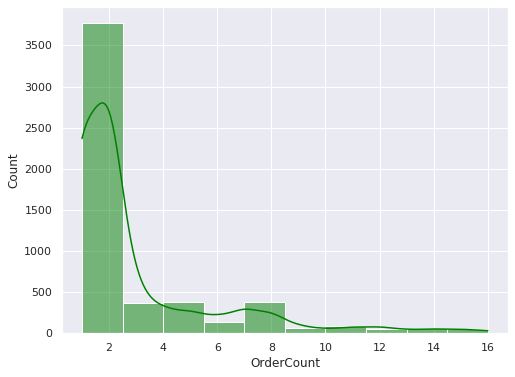

In [17]:
# OrderCount

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='OrderCount', 
            kde=True, 
            bins=10, 
            data=df, 
            color='green', 
            alpha = 0.5)
plt.show()

- 지난 달 총 주문 수는 0 ~ 2번이 3500명 이상으로 가장 많았음

> #### - 최근 주문

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


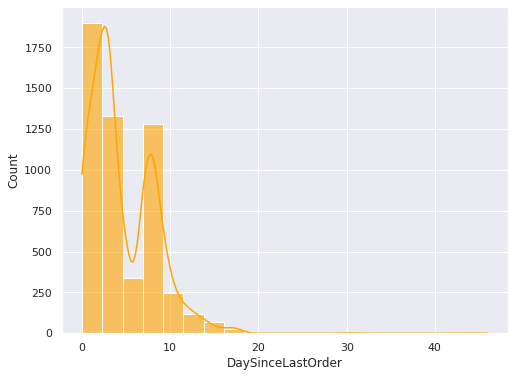

In [18]:
# DaySinceLastOrder

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='DaySinceLastOrder', 
            kde=True, 
            bins=20, 
            data=df, 
            color='orange', 
            alpha = 0.6)
plt.show()

- 최근 주문은 5일 이내가 3000명 이상으로 가장 많았음

> #### - OrderAmountHikeFromlastYear

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


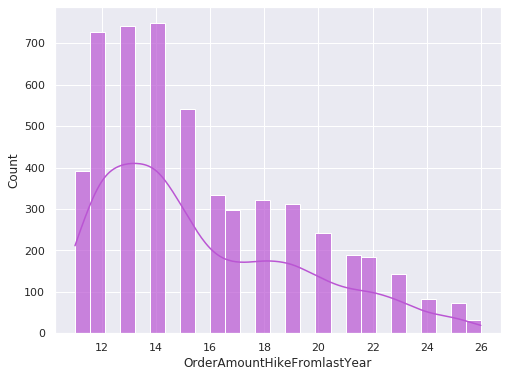

In [19]:
# OrderAmountHikeFromlastYear

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='OrderAmountHikeFromlastYear', 
            kde=True, 
            #bins=10, 
            data=df, 
            color='mediumorchid', 
            alpha = 0.7)
plt.show()

In [20]:
df['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

고객 주문 증가율은 12 ~ 14가 2219명으로 가장 많음

> #### - 앱 사용 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


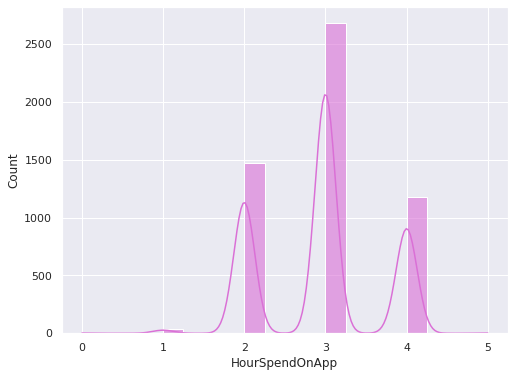

In [21]:
# HourSpendOnApp

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='HourSpendOnApp', 
            kde=True, 
            bins=20, 
            data=df, 
            color='orchid', 
            alpha = 0.6)
plt.show()

앱 사용 시간은 3시간이 2500명 이상으로 가장 많았음

보통 사용 시간은 2시간 ~ 4시간 정도로 보임

In [22]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

> #### - Preferred Login Device
(Mobile Phone과 Phone 합쳐줌)

In [23]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [24]:
# Mobile Phone과 Phone 합쳐줌
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [25]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

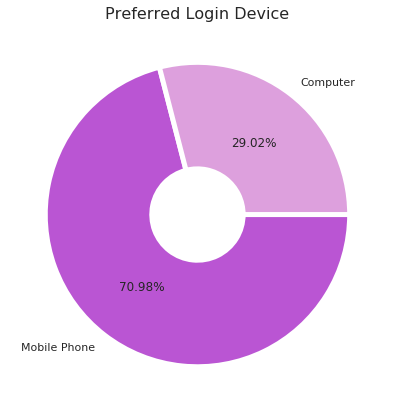

In [26]:
# PreferredLoginDevice

colors = ['mediumorchid', 'plum']
plt.figure(figsize=(7,7))

labels = ("Mobile Phone", "Computer")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['PreferredLoginDevice'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Preferred Login Device", fontsize=16)

plt.show()

선호하는 로그인 디바이스는 핸드폰이 70.98%로 더 많았음

> #### - PreferedOrderCat
(Mobile Phone과 Mobile 합쳐줌)

In [27]:
# PreferedOrderCat
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [28]:
# Mobile Phone과 Mobile 합쳐줌

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [29]:
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

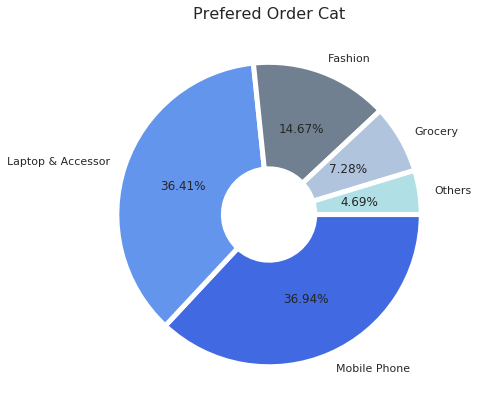

In [30]:
# PreferedOrderCat

colors = ['royalblue', 'cornflowerblue','slategrey', 'lightsteelblue', 'powderblue']
plt.figure(figsize=(7,7))

labels = ("Mobile Phone", "Laptop & Accessor", 'Fashion', 'Grocery', 'Others')

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df['PreferedOrderCat'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Prefered Order Cat", fontsize=16)

plt.show()

선호하는 구매는 1. 모바일 폰 37%, 랩탑 36%, 패션 15%, 식품 7%, 기타 5%

> #### - PreferredPaymentMode
(CC와 Credit Card 합쳐줌)
(COD와 Cash on Delivery 합쳐줌)

In [31]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [32]:
# CC와 Credit Card 합쳐줌
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')

In [33]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [34]:
# COD와 Cash on Delivery 합쳐줌
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

In [35]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

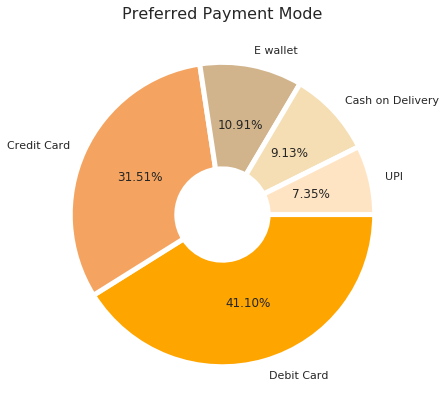

In [36]:
# PreferredPaymentMode

colors = ['orange', 'sandybrown', 'tan','wheat','bisque']
plt.figure(figsize=(7,7))

labels = ("Debit Card", "Credit Card", 'E wallet', 'Cash on Delivery', 'UPI')

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(df['PreferredPaymentMode'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Preferred Payment Mode", fontsize=16)

plt.show()

선호하는 구매 수단은 Debit card(직불카드)와 Credit Card(신용카드) (72%)

> #### - SatisfactionScore

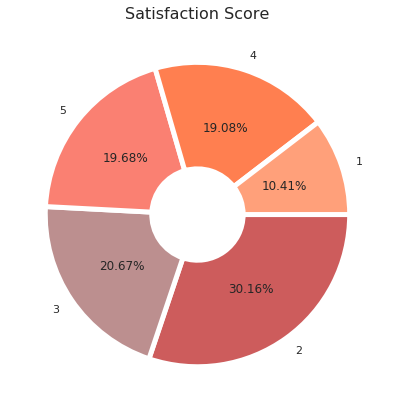

In [37]:
# SatisfactionScore

colors = ['indianred' ,'rosybrown', 'salmon', 'coral', 'lightsalmon']
plt.figure(figsize=(7,7))

labels = ("2", "3", '5', '4', '1')

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(df['SatisfactionScore'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Satisfaction Score", fontsize=16)

plt.show()

고객 만족도는 2점이 30%로 가장 높았음

> #### - 컴플레인

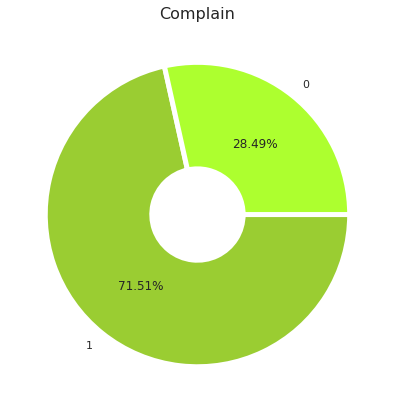

In [38]:
# Complain

colors = ['yellowgreen' ,'greenyellow']
plt.figure(figsize=(7,7))

labels = ("1", "0")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(df['Complain'].value_counts(), 
        autopct='%1.2f%%', 
        labels = labels, 
        counterclock=False, 
        colors=colors, 
        wedgeprops=wedgeprops)

plt.title("Complain", fontsize=16)

plt.show()

71%가 컴플레인 안 함

> #### - CashbackAmount

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


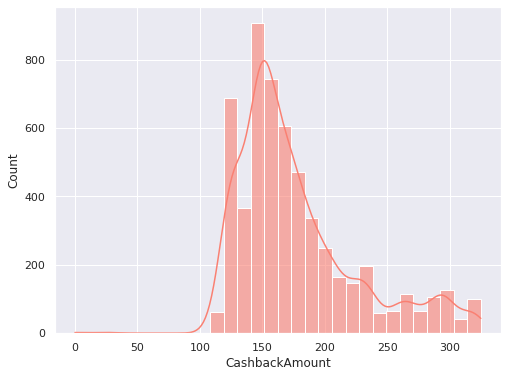

In [39]:
# CashbackAmount

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='CashbackAmount', 
            kde=True, 
            bins=30, 
            data=df, 
            color='salmon', 
            alpha = 0.6)
plt.show()

지난 달 캐쉬백은 150 포인트가 800명 이상으로 가장 많음

> #### - CouponUsed

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


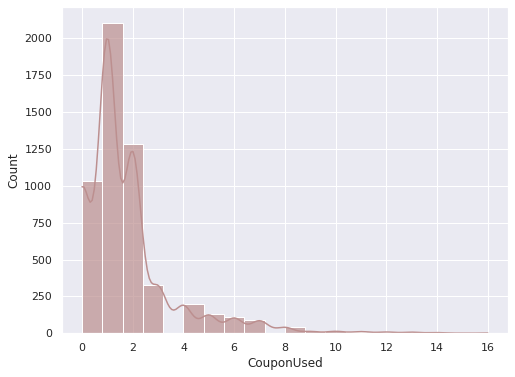

In [40]:
# CouponUsed

sns.set(rc={'figure.figsize':(8, 6)})
sns.histplot(x='CouponUsed', 
            kde=True, 
            bins=20, 
            data=df, 
            color='rosybrown', 
            alpha = 0.7)
plt.show()

지난 달 사용한 쿠폰은 1개가 2000명 이상으로 가장 많음

> #### - 만족도에 따른 고객 이탈률

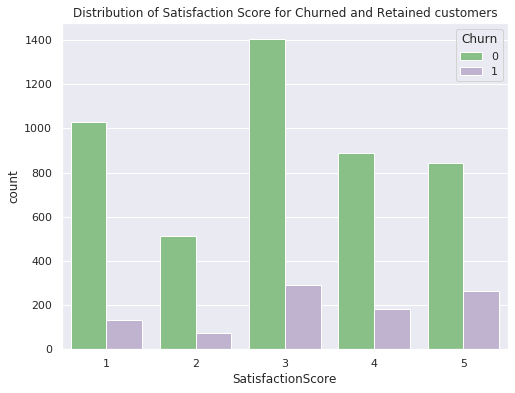

In [41]:
sns.countplot(x='SatisfactionScore', 
              hue='Churn', 
              palette='Accent',
              data=df)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

만족도는 이탈률에 작은 영향 미침

> #### - 컴플레인에 따른 고객 이탈률

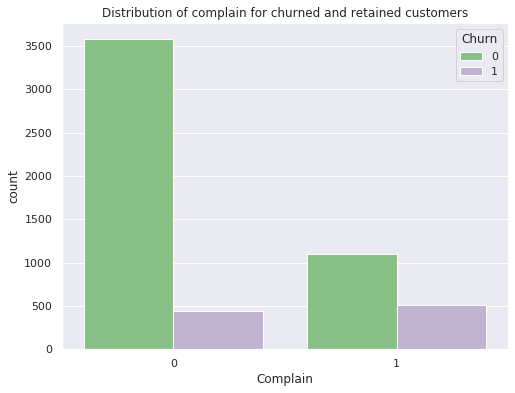

In [42]:
sns.countplot(x='Complain', 
              hue='Churn',
               palette='Accent', 
              data=df)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

왼쪽은 이탈 X와 이탈 O가 차이 많이 나는 것에 비해

오른쪽은 이탈 X와 이탈 O가 차이가 별로 나지 않음

--> 컴플레인과 이탈률은 상관관계가 있음

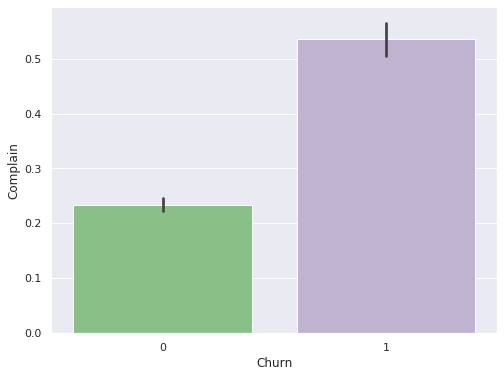

In [43]:
sns.barplot(data=df, x="Churn", y="Complain", palette='Accent')

컴플레인은 이탈률에 영향을 미치는 것을 알 수 있음

> 가입 기간에 따른 이탈률

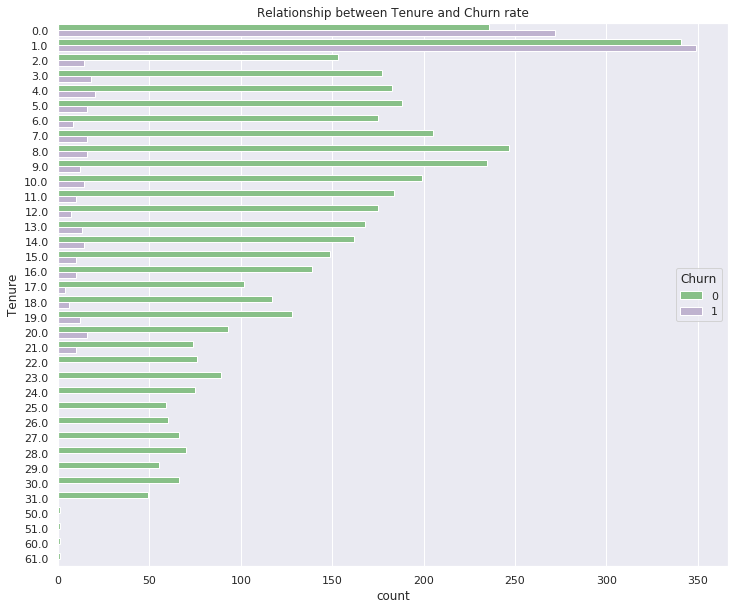

In [44]:
plt.figure(figsize=(12,10))
sns.countplot(y='Tenure', 
              hue='Churn', 
              palette='Accent',
              data=df)
plt.title("Relationship between Tenure and Churn rate")
plt.show()

> 가입기간(개월)이 적을 수록 많이 이탈함

> 최근 주문에 따른 이탈률

(마지막 주문 이후 일수가 적은 고객이 최근 고객)

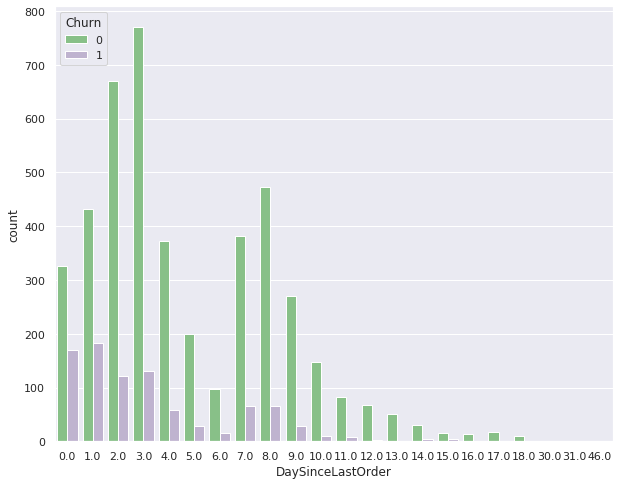

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(x='DaySinceLastOrder', 
              hue='Churn',
               palette='Accent', 
              data=df)
plt.show()

> 앱 사용시간에 따른 이탈률

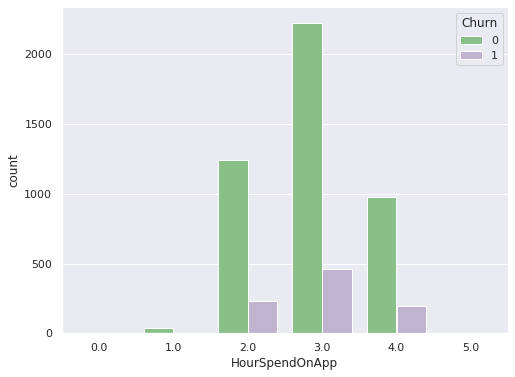

In [46]:
sns.countplot(x='HourSpendOnApp', 
              hue='Churn',
               palette='Accent', 
              data=df)
#plt.title("d")
plt.show()

> 결혼여부에 따른 이탈률

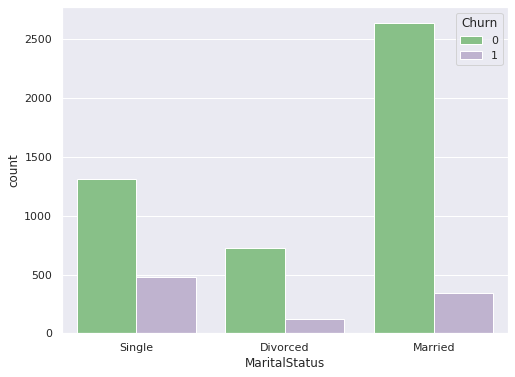

In [47]:
sns.countplot(x='MaritalStatus', 
              hue='Churn',
               palette='Accent', 
              data=df)
#plt.title("d")
plt.show()

싱글이 이탈률 더 높음

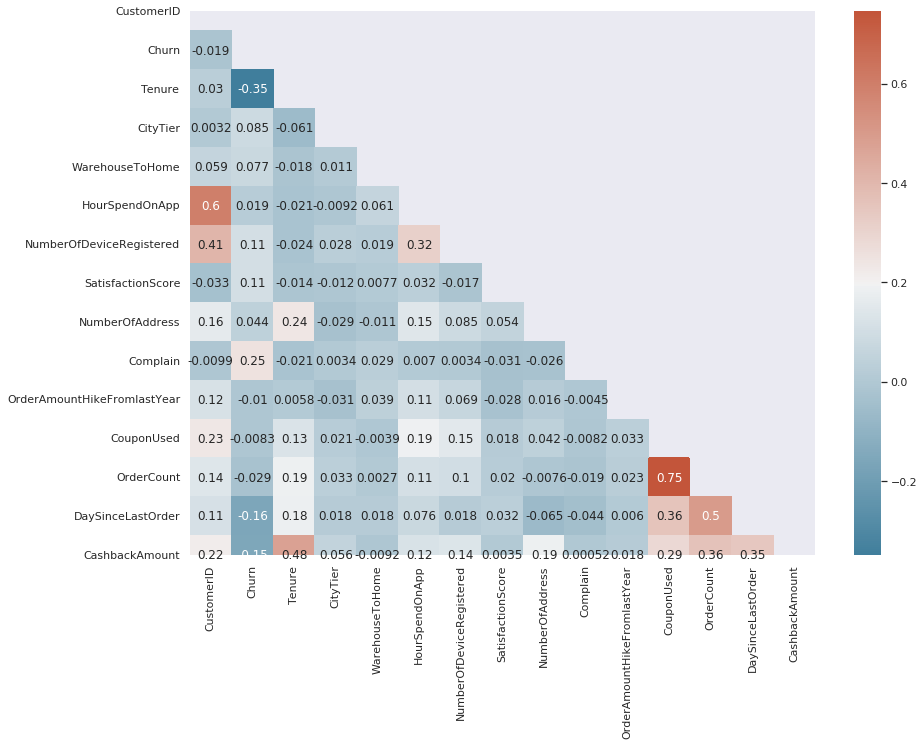

In [48]:
# correlations of variables

import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

> #### ⭐ EDA 정리

- 이탈률 : 이탈 X - 83%, 이탈 O - 17%

- 근무기간 : 0 ~ 5년이 2000개 이상으로 가장 많았음

- 지난 달 총 주문 수 : 0 ~ 2번이 3500명 이상으로 가장 많았음

- 최근 주문 : 5일 이내가 3000명 이상으로 가장 많았음

- 고객 주문 증가율 : 14가 750명으로 가장 많음

- 선호하는 로그인 디바이스 : Mobile Phone과 Phone 합쳐줌, 모바일 폰이 71%, 컴퓨터가 29%

- 선호하는 구매 : 1. 모바일 폰 37%, 랩탑 36%, 패션 15%, 식품 7%, 기타 5%

- 선호하는 구매 수단 : Debit card(직불카드) 41% Credit Card(신용카드) 32%, e-wallet 11%, cash on delivery 9%, UPI(유니온페이) 7%

- 고객만족도 : 1점(10%), 2점(30%), 3점(21%), 4점(19%), 5점(20%)

- 가입기간(개월) : 적을 수록 많이 이탈함

- 컴플레인 : 컴플레인 X - 72%, 컴플레인 O - 28%

- 전 달 캐쉬백 : 150 포인트가 800명 이상으로 가장 많음

- 쿠폰 사용 : 1개 사용이 2000명 이상으로 가장 많음

- 결혼 여부 : 싱글이 이탈률 더 높음

- 고객만족도는 이탈률에 큰 영향을 미치지 않음

- 이탈률에 가장 큰 영향을 미치는 변수는 컴플레인

-------------------------------------------------------------------------------------------------------

### 데이터 전처리

총 데이터 수가 너무 적어 결측치 drop 할 수 없음

결측치를 0으로 채우면 분석에 영향 감

--> 변수의 평균값으로 결측치 처리

In [49]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [50]:
# 결측치 비율(%) 확인
df.isnull().sum() / len(df)*100 

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [51]:
# 결측치 평균으로 채우기

df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)

df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean(), inplace=True)

df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean(), inplace=True)

df['CouponUsed'].fillna(df['CouponUsed'].mean(), inplace=True)

df['OrderCount'].fillna(df['OrderCount'].mean(), inplace=True)

df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mean(), inplace=True)

In [52]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

> #### - 모델링

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

# 테스트 사이즈 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# train, test 데이터가 잘 나눠졌는지 확인

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4504, 19), (1126, 19), (4504,), (1126,))

> #### - 원핫인코딩

In [55]:
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier','WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [56]:
#from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df[cat])

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

In [57]:
X_train_ohe

,CustomerID,Tenure,PreferredLoginDevice_1,PreferredLoginDevice_2,CityTier,WarehouseToHome,PreferredPaymentMode_1,PreferredPaymentMode_2,PreferredPaymentMode_3,PreferredPaymentMode_4,...,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,54479,1.000000,1,0,1,12.0,1,0,0,0,...,1,0,0,3,1,13.0,1.0,2.0,3.000000,149.78
3685,53686,17.000000,1,0,1,13.0,0,1,0,0,...,1,0,0,3,1,15.0,2.0,2.0,9.000000,165.81
731,50732,0.000000,1,0,1,9.0,1,0,0,0,...,1,0,0,2,0,12.0,0.0,1.0,2.000000,130.33
291,50292,10.189899,0,1,1,8.0,1,0,0,0,...,0,1,0,2,1,23.0,1.0,1.0,0.000000,117.02
184,50185,4.000000,1,0,1,11.0,0,0,1,0,...,0,1,0,1,1,12.0,0.0,1.0,3.000000,148.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,53773,1.000000,1,0,1,27.0,1,0,0,0,...,1,0,0,2,0,15.0,2.0,2.0,3.000000,147.72
5191,55192,10.000000,1,0,3,16.0,0,0,0,0,...,0,0,1,6,0,12.0,5.0,5.0,4.543491,225.96
5226,55227,7.000000,1,0,1,11.0,0,1,0,0,...,0,0,1,10,0,12.0,2.0,2.0,3.000000,163.38
5390,55391,1.000000,1,0,1,36.0,0,1,0,0,...,0,0,1,3,0,14.0,2.0,2.0,3.000000,164.07


In [58]:
# 문자형 데이터가 없는 것 확인
(X_train_ohe.dtypes == 'object').sum()

0

In [59]:
X_train_ohe.shape

(4504, 31)

One-Hot Encoding 후 데이터는 4504개의 샘플과 35개의 컬럼으로 구성되어 있는 것을 확인할 수 있음

데이터 사이즈에 비해 컬럼의 수가 매우 많아서 "`과적합`"이 발생할 수 있음

> #### - 기준모델

In [60]:
# 기준 모델 

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

base = y_train.mode()[0]
# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듦. 기준모델로 예측
baseline = len(y_train) * [base]


baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도: {baseline_acc.round(2)}')

#baseline_r2 = r2_score(y_train, baseline)
#print(f'기준모델의 r2_score: {baseline_r2}')

baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 mae : {baseline_mae}')

기준모델 정확도: 0.83
기준모델의 mae : 0.169404973357016


r2_score: -0.20395616145415651  <- ..?^^ 음수가 나왔다 -> 단단히 잘못됐다 --> 과적합됐다

> #### - 모델

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix ,precision_score, recall_score

In [62]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [63]:
# 수치형 컬럼이 모두 평균 = 0(에 가까운 수), 표준편차 = 1(에 가까운 수)로 변환된 것을 확인할 수 있음

X_train[numeric_feats].describe().T[['mean', 'std']]

,mean,std
CustomerID,2.020093e-15,1.000111
Tenure,1.814219e-17,1.000111
CityTier,-8.479501e-17,1.000111
WarehouseToHome,-1.092475e-16,1.000111
HourSpendOnApp,7.319978e-16,1.000111
NumberOfDeviceRegistered,4.417228e-17,1.000111
SatisfactionScore,-1.640685e-16,1.000111
NumberOfAddress,-6.468084e-17,1.000111
Complain,2.445251e-17,1.000111
OrderAmountHikeFromlastYear,-7.458017e-16,1.000111


In [64]:
# 문자형 데이터가 없는 것 확인

(X_train_ohe.dtypes == 'object').sum()

0

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [66]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    #val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    #print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, test_score

> 릿지

Ridge Regression, alpha=0.01
학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


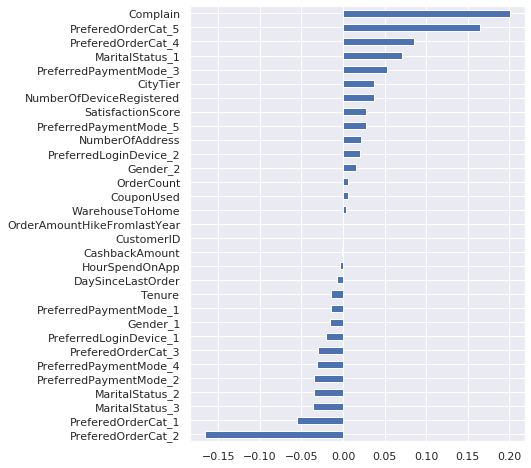

Ridge Regression, alpha=0.1
학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


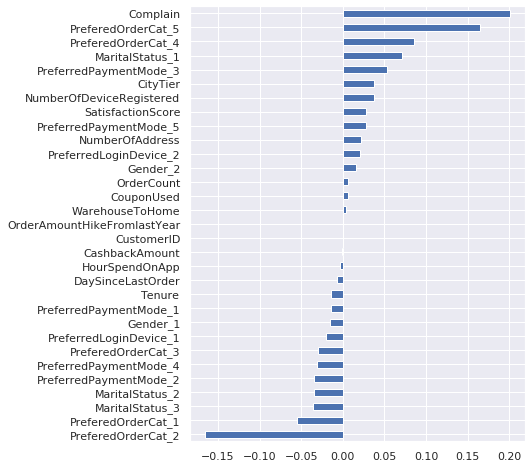

Ridge Regression, alpha=1.0
학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


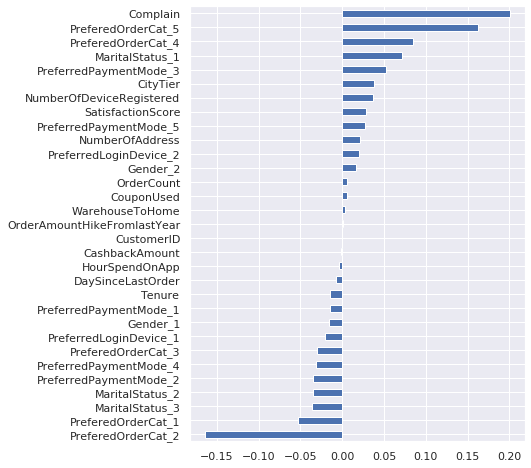

Ridge Regression, alpha=1
학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


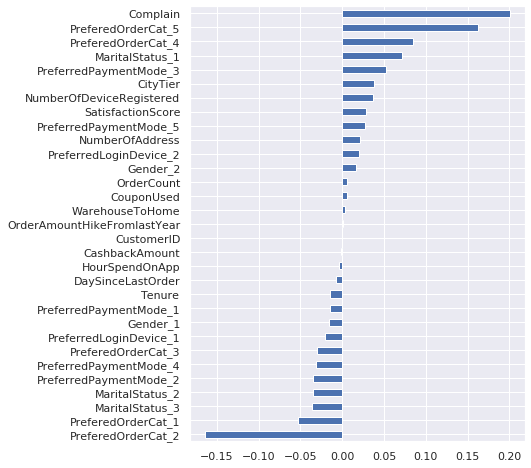

Ridge Regression, alpha=100.0
학습 세트 r2_score : 0.282
테스트 세트 r2_score : 0.302


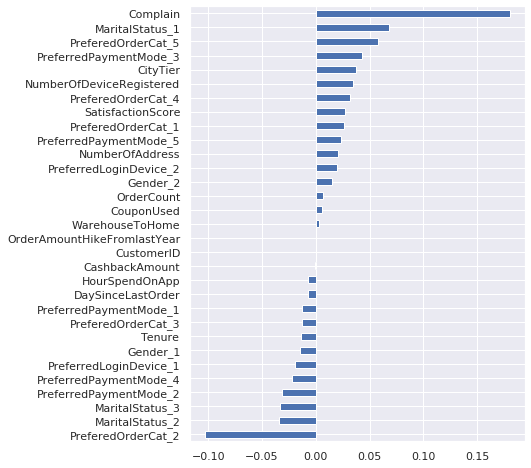

Ridge Regression, alpha=1000.0
학습 세트 r2_score : 0.255
테스트 세트 r2_score : 0.271


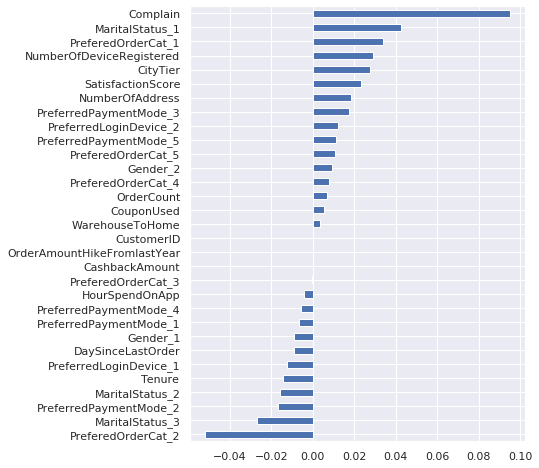

Ridge Regression, alpha=10000.0
학습 세트 r2_score : 0.18
테스트 세트 r2_score : 0.186


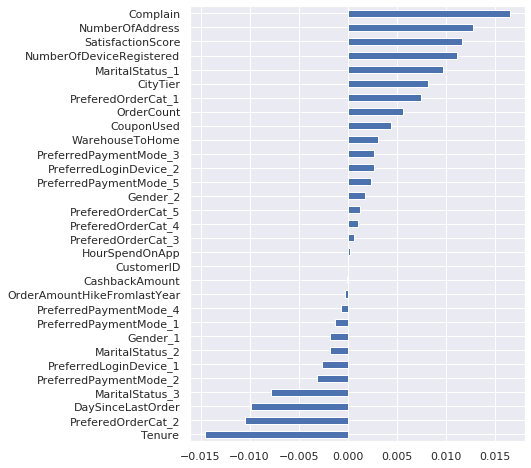

In [67]:
# 패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인

for alpha in [0.01, 0.1, 1.0, 1, 100.0, 1000.0, 10000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    ridge = Ridge(alpha=alpha)  
    ridge.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냄 
    coefficients = pd.Series(ridge.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [68]:
from sklearn.linear_model import RidgeCV, LassoCV

# ridgecv로 학습
alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_ohe, y_train)

print("alpha: ", ridge.alpha_)


# 성능 확인
ridge_train, ridge_test = print_score(ridge, X_train_ohe, y_train, X_test_ohe, y_test)

alpha:  1
학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


> 라쏘

Lasso Regression, alpha=1e-06


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+01, tolerance: 6.337e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


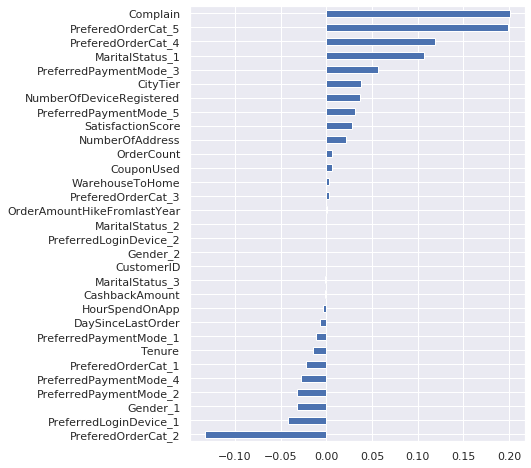

Lasso Regression, alpha=0.001
학습 세트 r2_score : 0.283
테스트 세트 r2_score : 0.303


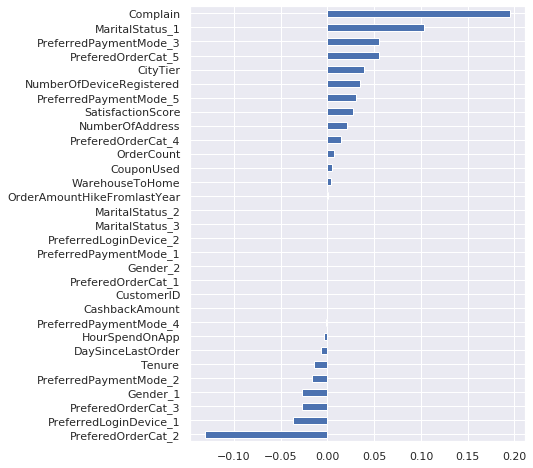

Lasso Regression, alpha=0.01
학습 세트 r2_score : 0.259
테스트 세트 r2_score : 0.275


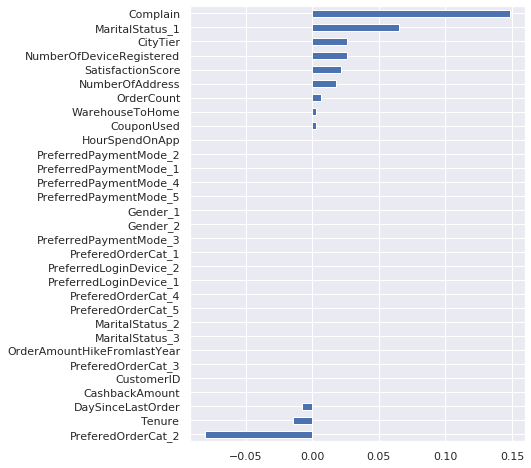

Lasso Regression, alpha=1.0
학습 세트 r2_score : 0.025
테스트 세트 r2_score : 0.01


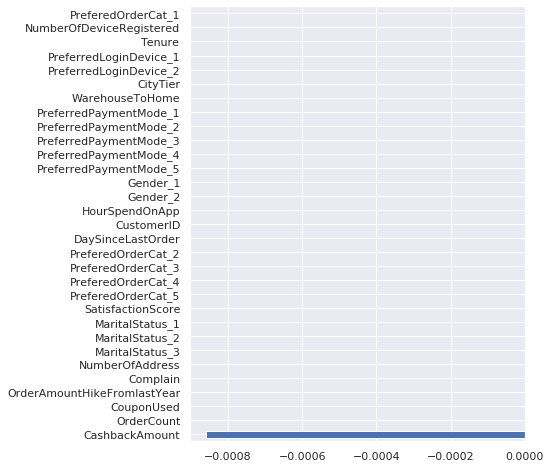

Lasso Regression, alpha=100
학습 세트 r2_score : 0.0
테스트 세트 r2_score : -0.0


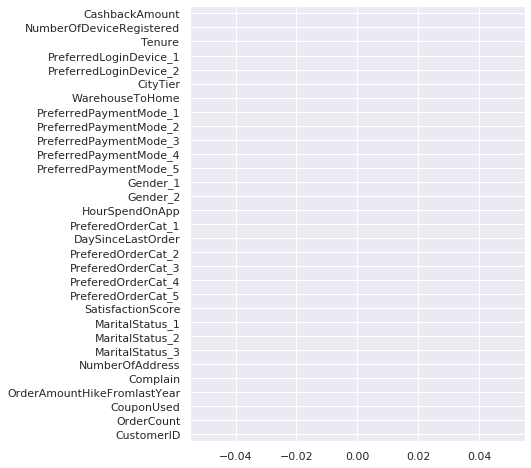

In [69]:
"""
패널티값(alpha)이 커질수록 회귀계수가 작아지는 것을 그래프로 확인해보세요.
"""

for alpha in [0.000001, 0.001, 0.01, 1.0, 100]:
        
    print(f'Lasso Regression, alpha={alpha}')

    # Ridge 모델 학습
    lasso = Lasso(alpha=alpha)  
    lasso.fit(X_train_ohe, y_train)

    # 성능 확인
    print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

    # plot coefficients
    # 절대값 상위 40개의 회귀계수만 그래프에 나타냈습니다. 
    coefficients = pd.Series(lasso.coef_, X_train_ohe.columns)
    idx = np.abs(coefficients).head(40).index
    plt.figure(figsize=(6, 8))
    coefficients[idx].sort_values().plot.barh()
    plt.show()

In [70]:
from sklearn.linear_model import LassoCV

# lassocv로 학습
alphas = np.arange(10, 200, 10)
lasso = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso.fit(X_train_ohe, y_train)

print("alpha: ", lasso.alpha_)

# 성능 확인
lasso_train, lasso_test = print_score(lasso, X_train_ohe, y_train, X_test_ohe, y_test)

alpha:  10
학습 세트 r2_score : 0.0
테스트 세트 r2_score : -0.0


In [71]:
###

# 단순선형회귀 (OLS)

model_ols = LinearRegression()
model_ols.fit(X_train_ohe, y_train)
train_y_ols_pred = model_ols.predict(X_train_ohe)
#val_y_ols_pred = model_ols.predict(X_val_ohe)
test_y_ols_pred = model_ols.predict(X_test_ohe)

In [72]:
eval_compare = pd.DataFrame(index = ['train', 'Test'], data = {'Ridge':[ridge_train, ridge_test], 'Lasso':[lasso_train, lasso_test]})
eval_compare

,Ridge,Lasso
train,0.285,0.0
Test,0.303,-0.0


In [73]:
def print_score(model, X_train, y_train, X_test, y_test) :

    train_score = np.round(model.score(X_train, y_train) , 3)
    #val_score = np.round(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=3).round(3)),3)
    test_score = np.round(model.score(X_test, y_test),3)
    print(f'학습 세트 r2_score : {train_score}')
    #print(f'검증 세트 r2_score : {val_score}')
    print(f'테스트 세트 r2_score : {test_score}')

    return train_score, test_score

In [74]:
from sklearn.model_selection import cross_val_score

# 선형회귀를 ols라는 객체에 저장
ols = LinearRegression()

# 모델 학습
ols.fit(X_train_ohe, y_train)

# 성능 비교
ols_train, ols_test = print_score(ols,X_train_ohe, y_train, X_test_ohe, y_test)

학습 세트 r2_score : 0.285
테스트 세트 r2_score : 0.303


In [75]:
eval_compare = pd.DataFrame(index = ['train', 'Test'], data = {'OLS':[ols_train, ols_test], 'Ridge':[ridge_train, ridge_test], 'Lasso':[lasso_train, lasso_test]})
eval_compare

,OLS,Ridge,Lasso
train,0.285,0.285,0.0
Test,0.303,0.303,-0.0


In [76]:
from sklearn.linear_model import LinearRegression, LogisticRegression

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train_ohe, y_train)
#y_val_pred = logistic.predict(X_val_ohe)
print('logistic train accuracy', logistic.score(X_train_ohe, y_train).round(2))

logistic train accuracy 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


아 뭔가 이상하다

------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------

### 다시

In [77]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

# 테스트 사이즈 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# 기준 모델 

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error

base = y_train.mode()[0]
# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듦. 기준모델로 예측
baseline = len(y_train) * [base]

baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델 정확도: {baseline_acc.round(2)}')


baseline_r2 = r2_score(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')

baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 mae : {baseline_mae}')

기준모델 정확도: 0.83
기준모델의 r2_score: -0.20395616145415651
기준모델의 mae : 0.169404973357016


기준모델 정확도: 0.83

----------------------------------------------------------------------------------------------------

In [79]:
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

numerical_cols = ['Churn', 'Tenure',  'CityTier','WarehouseToHome',  'HourSpendOnApp',
       'NumberOfDeviceRegistered',  'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [80]:
#from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(df[cat])

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [81]:
X_train

,CustomerID,Tenure,PreferredLoginDevice_1,PreferredLoginDevice_2,CityTier,WarehouseToHome,PreferredPaymentMode_1,PreferredPaymentMode_2,PreferredPaymentMode_3,PreferredPaymentMode_4,...,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,54479,1.000000,1,0,1,12.0,1,0,0,0,...,1,0,0,3,1,13.0,1.0,2.0,3.000000,149.78
3685,53686,17.000000,1,0,1,13.0,0,1,0,0,...,1,0,0,3,1,15.0,2.0,2.0,9.000000,165.81
731,50732,0.000000,1,0,1,9.0,1,0,0,0,...,1,0,0,2,0,12.0,0.0,1.0,2.000000,130.33
291,50292,10.189899,0,1,1,8.0,1,0,0,0,...,0,1,0,2,1,23.0,1.0,1.0,0.000000,117.02
184,50185,4.000000,1,0,1,11.0,0,0,1,0,...,0,1,0,1,1,12.0,0.0,1.0,3.000000,148.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,53773,1.000000,1,0,1,27.0,1,0,0,0,...,1,0,0,2,0,15.0,2.0,2.0,3.000000,147.72
5191,55192,10.000000,1,0,3,16.0,0,0,0,0,...,0,0,1,6,0,12.0,5.0,5.0,4.543491,225.96
5226,55227,7.000000,1,0,1,11.0,0,1,0,0,...,0,0,1,10,0,12.0,2.0,2.0,3.000000,163.38
5390,55391,1.000000,1,0,1,36.0,0,1,0,0,...,0,0,1,3,0,14.0,2.0,2.0,3.000000,164.07


원핫인코딩 --> 4504 rows × 35 columns

> 로지스틱 회귀

In [82]:
# 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test accuracy score:' + str(model.score(X_test, y_test))) #accuracy

Train accuracy score: 0.8521314387211367
Test accuracy score:0.8623445825932504


과적합

In [83]:
pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(random_state=42, n_jobs = -1, class_weight="balanced")  # class_weight="balanced" <- 가중치 줘서 과적합 해결
)
pipe.fit(X_train, y_train)
print("정확도", pipe.score(X_test, y_test))

정확도 0.8232682060390764


              precision    recall  f1-score   support

           0       0.96      0.82      0.89       941
           1       0.48      0.82      0.60       185

    accuracy                           0.82      1126
   macro avg       0.72      0.82      0.75      1126
weighted avg       0.88      0.82      0.84      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 504x360 with 0 Axes>

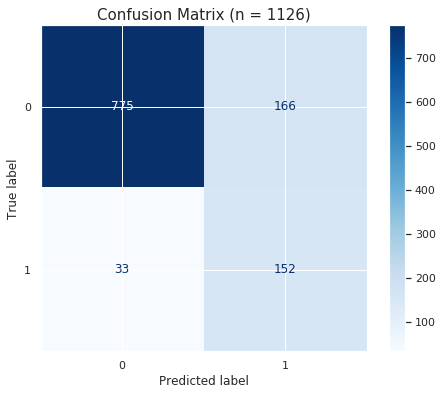

AUC: 0.8930005457104289


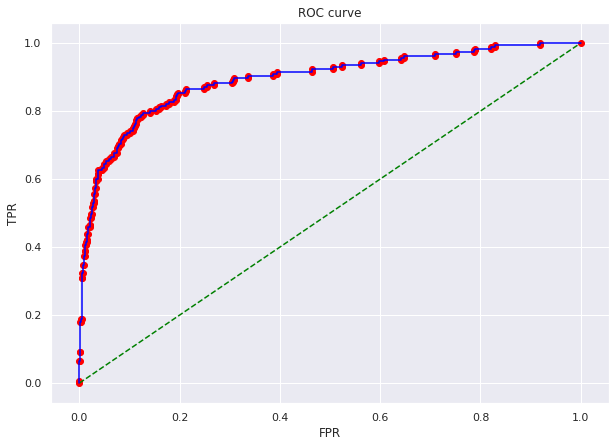

Test score for Logistic Regression: 0.6043737574552684
Training score for Logistic Regression: 0.5862552594670406


In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


print(classification_report(y_test, pipe.predict(X_test)))


plt.figure(figsize=(7,5))
plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True, fmt="g", cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,7))
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print(f"Test score for Logistic Regression: {f1_score(y_test, pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, pipe.predict(X_train))}")

Test score for Logistic Regression: 0.6043737574552684

Training score for Logistic Regression: 0.5862552594670406

> 결정 트리

In [85]:
# 결정 트리

from sklearn import tree

model = tree.DecisionTreeClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 1.0
Test accuracy score:0.9609236234458259


과적합

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth=6, class_weight="balanced"))
dt_pipe.fit(X_train, y_train)

print("정확도: ", dt_pipe.score(X_train, y_train))

정확도:  0.8738898756660746


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       941
           1       0.56      0.76      0.65       185

    accuracy                           0.86      1126
   macro avg       0.76      0.82      0.78      1126
weighted avg       0.89      0.86      0.87      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


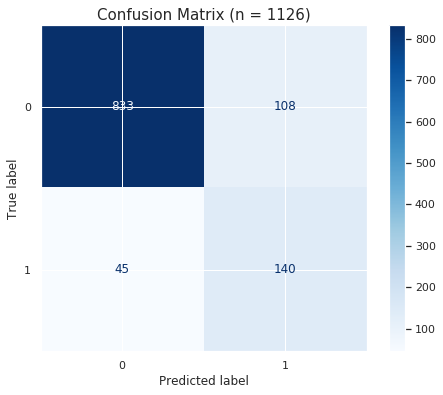

AUC: 0.8990780365913202


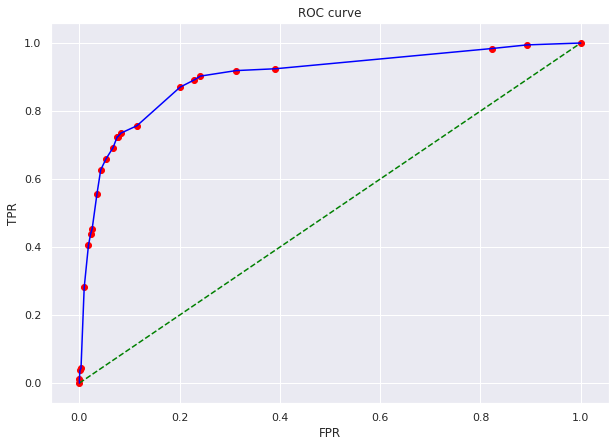

Test score for DecisionTree: 0.6466512702078522
Training score for DecisionTree: 0.6885964912280702


In [87]:
print(classification_report(y_test, dt_pipe.predict(X_test)))

plot_confusion_matrix(dt_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, dt_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = dt_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,7))
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print(f"Test score for DecisionTree: {f1_score(y_test, dt_pipe.predict(X_test))}")
print(f"Training score for DecisionTree: {f1_score(y_train, dt_pipe.predict(X_train))}")

Test score for DecisionTreet: 0.651270207852194

Training score for DecisionTree: 0.6889742183214481

랜덤포레스트

In [88]:
model = RandomForestClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 1.0
Test accuracy score:0.9644760213143873


과적합

In [89]:
rf_pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs = -1, oob_score = True, class_weight="balanced", max_depth = 6)  # class_weight="balanced" <- 가중치 줘서 과적합 해결
)
rf_pipe.fit(X_train, y_train)
print("정확도", rf_pipe.score(X_test, y_test))

정확도 0.8712255772646537


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       941
           1       0.58      0.78      0.67       185

    accuracy                           0.87      1126
   macro avg       0.77      0.84      0.79      1126
weighted avg       0.89      0.87      0.88      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


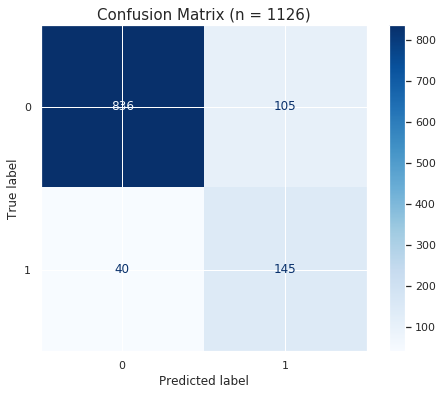

AUC: 0.9197690783238074


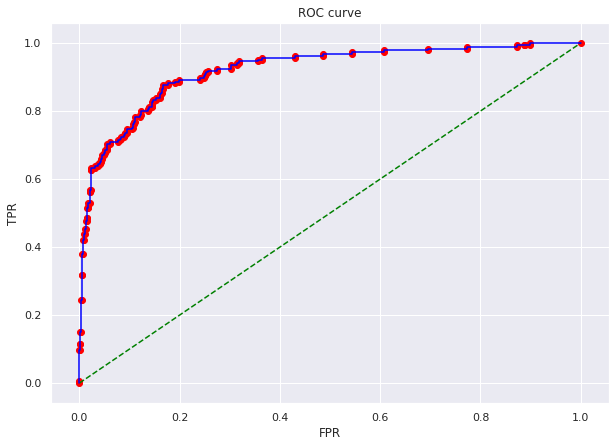

Test score for Random Forest: 0.6666666666666666
Training score for Random Forest: 0.7092960773777539


In [90]:
print(classification_report(y_test, rf_pipe.predict(X_test)))

plot_confusion_matrix(rf_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = rf_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,7))
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")

Test score for Random Forest: 0.651270207852194

Training score for Random Forest: 0.7018498367791076

> XGBoost

In [91]:
from xgboost import XGBClassifier

In [92]:
model = XGBClassifier() 
model.fit(X_train,y_train)
print('Train accuracy score: ' + str(model.score(X_train, y_train))) #recall
print('Test accuracy score:' + str(model.score(X_test, y_test))) #recall

Train accuracy score: 0.9273978685612788
Test accuracy score:0.9218472468916519


In [93]:

xgb_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        n_estimators = 200,
        random_state = 42,
        n_jobs = -1,
        learning_rate = 0.1,
        class_weight = "balanced",
        use_label_encoder = False,
        scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1] # sum(negative instances) / sum(positive instances)   # y_train.value_counts()[0]/y_train.value_counts()[1]
    ),
)
xgb_pipe.fit(X_train, y_train)
print("검증 정확도", xgb_pipe.score(X_test, y_test))

검증 정확도 0.8978685612788633


              precision    recall  f1-score   support

           0       0.96      0.91      0.94       941
           1       0.65      0.82      0.72       185

    accuracy                           0.90      1126
   macro avg       0.81      0.87      0.83      1126
weighted avg       0.91      0.90      0.90      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


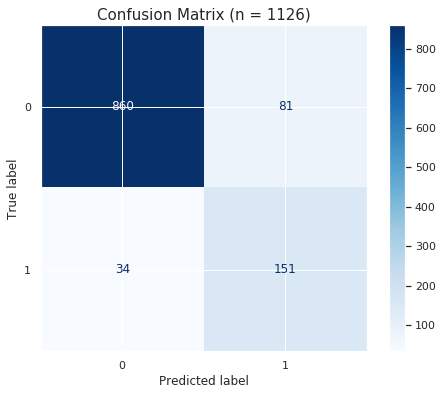

AUC: 0.9474796794669271


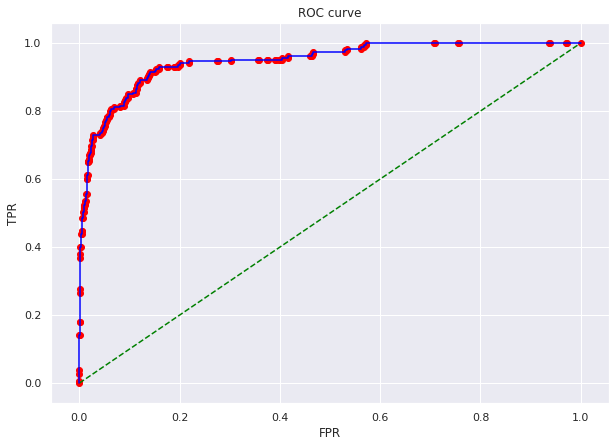

Test score for XGBoost: 0.7242206235011991
Training score for XGBoost: 0.8175099488345652


In [94]:
print(classification_report(y_test, xgb_pipe.predict(X_test)))

plot_confusion_matrix(xgb_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = xgb_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,7))
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")

Test score for XGBoost: 0.7554479418886199

Training score for XGBoost: 0.8145620022753128

> RandomSearchCV - XGBoost

In [95]:
from scipy.stats.distributions import uniform

params = {
    "simpleimputer__strategy": ["median", "mean"],
    "xgbclassifier__max_depth": [2, 4, 8],
    "xgbclassifier__min_child_weight": [4, 8, 10],
    "xgbclassifier__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    ),  # 0.5 ~ 1 사이의 uniform 분포로 범위를 지정해 줍니다.
}

In [96]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    xgb_pipe,
    param_distributions = params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END simpleimputer__strategy=median, xgbclassifier__colsample_bytree=0.8982714934301164, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=10;, score=0.956 total time=   1.9s
[CV 2/3] END simpleimputer__strategy=median, xgbclassifier__colsample_bytree=0.8982714934301164, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=10;, score=0.954 total time=   2.0s
[CV 3/3] END simpleimputer__strategy=median, xgbclassifier__colsample_bytree=0.8982714934301164, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=10;, score=0.975 total time=   1.7s
[CV 1/3] END simpleimputer__strategy=mean, xgbclassifier__colsample_bytree=0.7993292420985183, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.961 total time=   1.1s
[CV 2/3] END simpleimputer__strategy=mean, xgbclassifier__colsample_bytree=0.7993292420985183, xgbclassifier__max_depth=8, xgbclassifier__min_child_weight=8;, score=0.958

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=[],
                                                             mapping=[])),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbclassifier',
                                              XGBClassifier(class_weight='balanced',
                                                            eval_metric='error',
                                                            n_estimators=200,
                                                            n_jobs=-1,
                                                            random_state=42,
                                                            scale_pos_weight=4.903014416775885,
                                                            use_label_encoder=False))]),
                   param_distributions={'simp

In [97]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'median', 'xgbclassifier__colsample_bytree': 0.5499874579090014, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 4}
최적 AUC:  0.9696323928186744


In [98]:
from xgboost import XGBClassifier

xgb_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        n_estimators = 200,
        random_state = 42,
        n_jobs = -1,
        learning_rate = 0.1,
        use_label_encoder = False,
        colsample_bytree= 0.5499874579090014,
        max_depth= 8,
        min_child_weight= 4,
        scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1] # sum(negative instances) / sum(positive instances)   # y_train.value_counts()[0]/y_train.value_counts()[1]
    ),
)
xgb_pipe.fit(X_train, y_train)
print("검증 정확도", xgb_pipe.score(X_test, y_test))

검증 정확도 0.9804618117229129


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       941
           1       0.95      0.93      0.94       185

    accuracy                           0.98      1126
   macro avg       0.97      0.96      0.96      1126
weighted avg       0.98      0.98      0.98      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


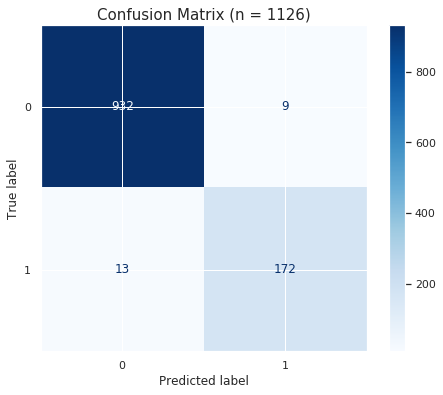

AUC: 0.9863572392796623


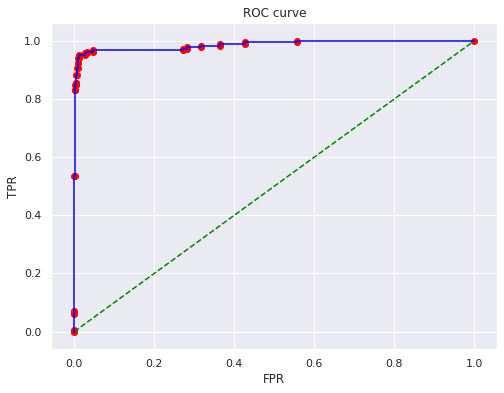

Test score for XGBoost: 0.9398907103825136
Training score for XGBoost: 0.9993451211525868


In [99]:
print(classification_report(y_test, xgb_pipe.predict(X_test)))

plot_confusion_matrix(xgb_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = xgb_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")

AUC: 0.9869374156302956

Test score for XGBoost: 0.9398907103825136

Training score for XGBoost: 0.9993451211525868

> 오버샘플링

In [100]:
sum(y_train == 0 ) ,sum(y_train ==1)

(3741, 763)

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

X_train_ow, y_train_ow = sm.fit_resample(X_train, y_train)
label_1 = sum(y_train_ow == 1)
label_0 = sum(y_train_ow == 0)

print('Now for 1 label there are {} instance  and for  0 label there are {}'.format(label_1, label_0))

Now for 1 label there are 3741 instance  and for  0 label there are 3741


In [102]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler


xgb_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        n_estimators = 200,
        random_state = 42,
        n_jobs = -1,
        learning_rate = 0.1,
        use_label_encoder = False,
        colsample_bytree= 0.5499874579090014,
        max_depth= 8,
        min_child_weight= 4,
        scale_pos_weight =y_train_ow.value_counts()[0]/y_train_ow.value_counts()[1] # sum(negative instances) / sum(positive instances)   # y_train.value_counts()[0]/y_train.value_counts()[1]
    ),
)

X_train_sampled, y_train_sampled = RandomUnderSampler(random_state=42).fit_resample(
    X_train_ow, y_train_ow
)


xgb_pipe.fit(X_train_sampled, y_train_sampled)
print("검증 정확도", xgb_pipe.score(X_train_sampled, y_train_sampled))

검증 정확도 0.9995990376904571


In [103]:
# oversampling 시 동일한 비율로 샘플링
y_train_sampled.value_counts()

0    3741
1    3741
Name: Churn, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       941
           1       0.94      0.80      0.87       185

    accuracy                           0.96      1126
   macro avg       0.95      0.90      0.92      1126
weighted avg       0.96      0.96      0.96      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


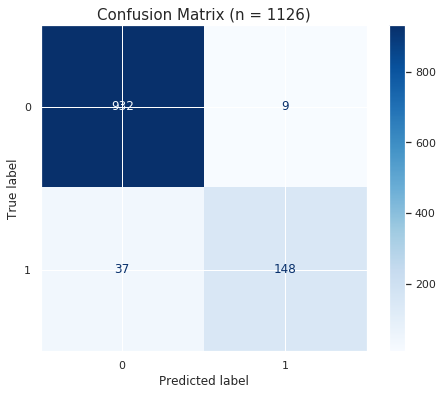

AUC: 0.9839561133928827


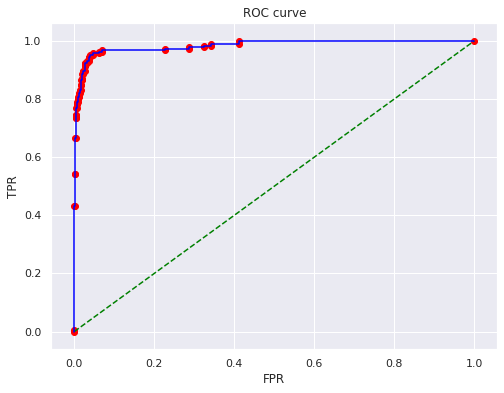

Test score for XGBoost: 0.8654970760233919
Training score for XGBoost: 0.998032786885246


In [104]:
print(classification_report(y_test, xgb_pipe.predict(X_test)))

plot_confusion_matrix(xgb_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = xgb_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")

Test score for XGBoost: 0.8753623188405797

Training score for XGBoost: 0.998032786885246

> 언더샘플링

In [105]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'median', 'xgbclassifier__colsample_bytree': 0.5499874579090014, 'xgbclassifier__max_depth': 8, 'xgbclassifier__min_child_weight': 4}
최적 AUC:  0.9696323928186744


In [106]:
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler


xgb_pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy= 'median'),
    XGBClassifier(
        objective = "binary:logistic",
        eval_metric = "error",
        n_estimators = 200,
        random_state = 42,
        n_jobs = -1,
        learning_rate = 0.1,
        use_label_encoder = False,
        colsample_bytree= 0.5499874579090014,
        max_depth= 8,
        min_child_weight= 4,
        scale_pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1] # sum(negative instances) / sum(positive instances)   # y_train.value_counts()[0]/y_train.value_counts()[1]
    ),
)

X_train_sampled, y_train_sampled = RandomUnderSampler(random_state=42).fit_resample(
    X_train, y_train
)


xgb_pipe.fit(X_train_sampled, y_train_sampled)
print("검증 정확도", xgb_pipe.score(X_train_sampled, y_train_sampled))

검증 정확도 0.9973787680209698


In [107]:
# Undersampling 시 동일한 비율로 샘플링
y_train_sampled.value_counts()

0    763
1    763
Name: Churn, dtype: int64

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       941
           1       0.55      0.95      0.70       185

    accuracy                           0.87      1126
   macro avg       0.77      0.90      0.81      1126
weighted avg       0.92      0.87      0.88      1126



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


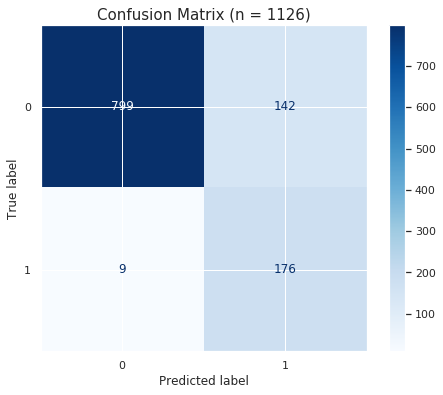

AUC: 0.9724732171065859


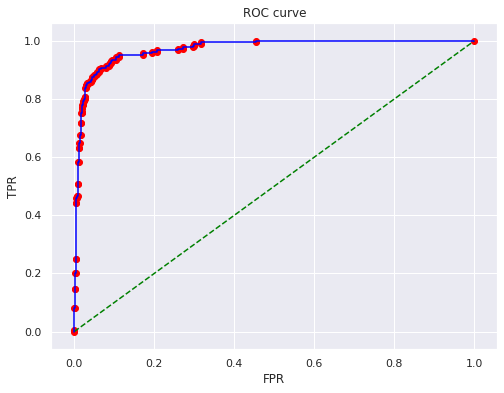

Test score for XGBoost: 0.6998011928429424
Training score for XGBoost: 0.7656798795785249


In [108]:
print(classification_report(y_test, xgb_pipe.predict(X_test)))

plot_confusion_matrix(xgb_pipe, X_test, y_test, cmap=plt.cm.Blues)
log_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
#sns.heatmap(log_mat, annot=True,fmt="g",cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = xgb_pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")

기존 XGBoost test score와 비교하면 학습에 사용된 데이터 수가 크게 감소되어 더 낮은 성능 결과를 반환한 것으로 보임

--> 이 모델에는 오버 샘플링이 맞는 것 같음

> PDP

In [109]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있음
#import matplotlib.pyplot as plt

#plt.rcParams["figure.dpi"] = 144

In [110]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> 순열중요도

In [113]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    xgb_pipe,  # model
    scoring = "roc_auc",  # metric
    n_iter = 5,  # 다른 random seed를 사용하여 10번 반복
    random_state = 42,
)

# 스코어를 다시 계산
X_test_preprocessed = xgb_pipe[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)


#perm = PermutationImportance(xgb_pipe, scoring = "f1", random_state = 42).fit(X_val, y_val)
#eli5.show_weights(perm, top = 80, feature_names = X_val.columns.tolist())

PermutationImportance(estimator=Pipeline(steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                mapping=[])),
                                                ('simpleimputer',
                                                 SimpleImputer(strategy='median')),
                                                ('xgbclassifier',
                                                 XGBClassifier(colsample_bytree=0.5499874579090014,
                                                               eval_metric='error',
                                                               max_depth=8,
                                                               min_child_weight=4,
                                                               n_estimators=200,
                                                               n_jobs=-1,
                                                               rando

Text(0.5, 1.0, 'Permutation feature Importance')

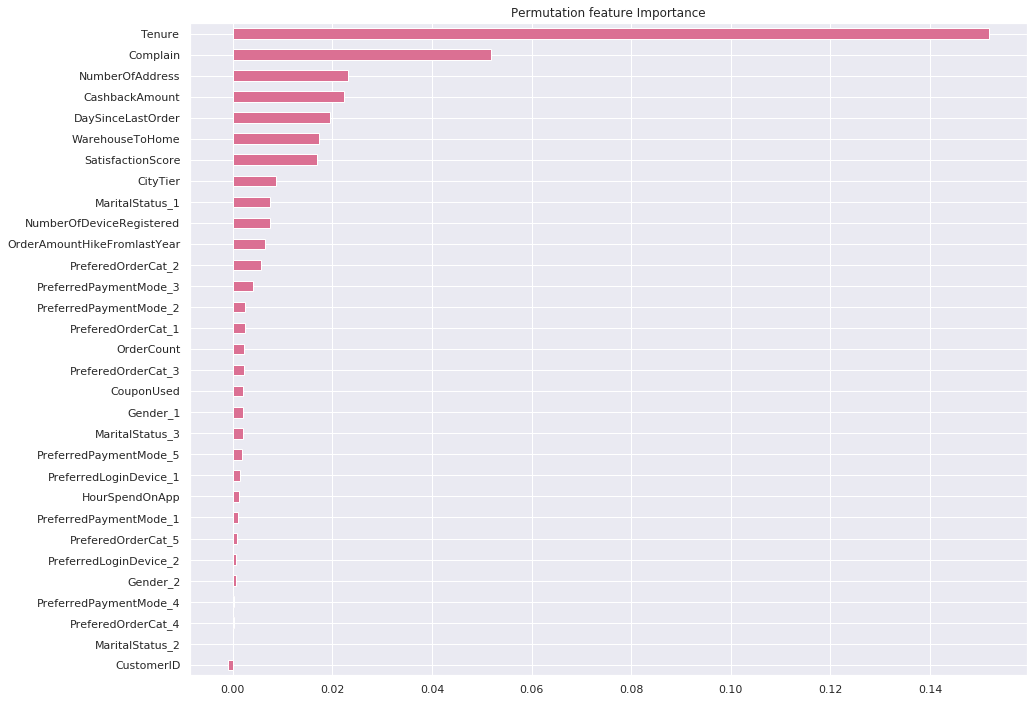

In [114]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(15,12))
pi.plot.barh(color = 'palevioletred')
plt.title("Permutation feature Importance")

In [115]:
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 함
)

Weight,Feature
0.1518 ± 0.0066,Tenure
0.0519 ± 0.0041,Complain
0.0231 ± 0.0050,NumberOfAddress
0.0223 ± 0.0021,CashbackAmount
0.0196 ± 0.0089,DaySinceLastOrder
0.0172 ± 0.0024,WarehouseToHome
0.0169 ± 0.0068,SatisfactionScore
0.0087 ± 0.0024,CityTier
0.0074 ± 0.0025,MaritalStatus_1
0.0074 ± 0.0026,NumberOfDeviceRegistered


In [116]:
#train, val = train_test_split(df, test_size=0.2, random_state=42)

#target = "Churn"

# 특성과 타겟을 분리
#X_train = train[cat + numerical_cols]
#y_train = train[target]
#X_val = val[cat + numerical_cols]
#y_val = val[target]

In [117]:
#from category_encoders import OrdinalEncoder
#from sklearn.metrics import classification_report, roc_auc_score
#from xgboost import XGBClassifier

#encoder = OrdinalEncoder()
#X_train_encoded = encoder.fit_transform(X_train)  # 학습데이터
#X_val_encoded = encoder.transform(X_val)  # 검증데이터

#boosting = XGBClassifier(
    #n_estimators=1000,
    #objective="binary:logistic",  # default
    #learning_rate=0.2,
    #subsample=0.8,
    #colsample_bytree=0.8,
#)

#eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

#boosting.fit(X_train_encoded, y_train, eval_set=eval_set, early_stopping_rounds=50)

In [118]:
#from pdpbox.pdp import pdp_isolate, pdp_plot

#target_feature = "Churn"

#isolated = pdp_isolate(
    #model=boosting,
    #dataset=X_val_encoded,
    #model_features=X_val.columns,
    #feature=target_feature,
    #grid_type="percentile",  # default = 'percentile', or 'equal'
    #num_grid_points=10,  # default = 10
#)
#pdp_plot(isolated, feature_name=target_feature)

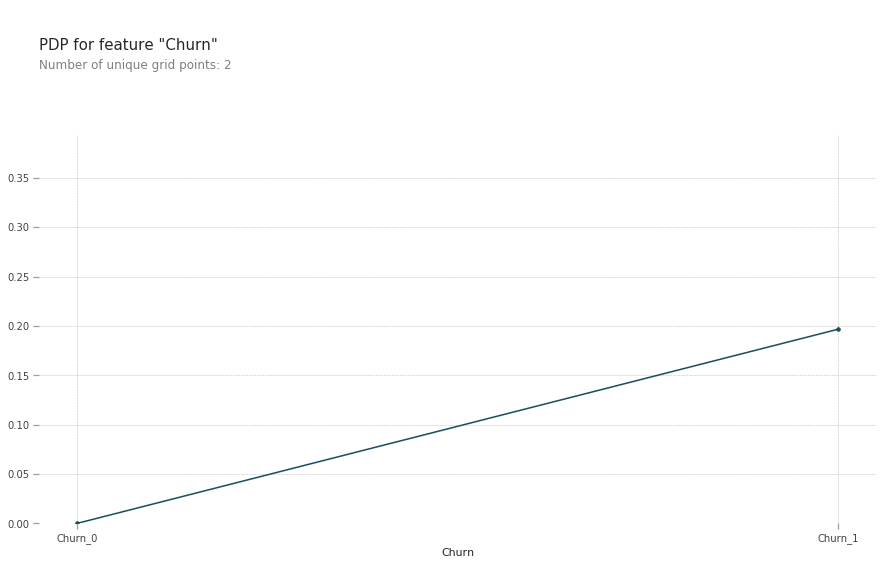

In [119]:
#pdp_plot(
    #isolated,
    #feature_name=target_feature,
    #plot_lines=True,  # ICE plots
    #frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    #plot_pts_dist=True,
#)

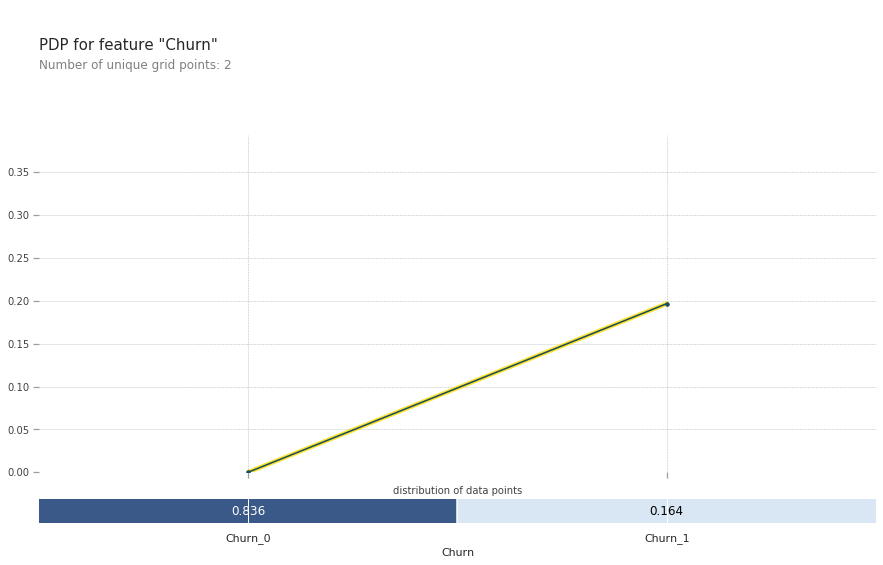

In [120]:
#from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [121]:
#target_features = ["Churn", "Tenure"]

#interaction = pdp_interact(
    #model=boosting,
    #dataset=X_val_encoded,
    #model_features=X_val.columns,
    #features=target_features,
#)

In [122]:
#pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

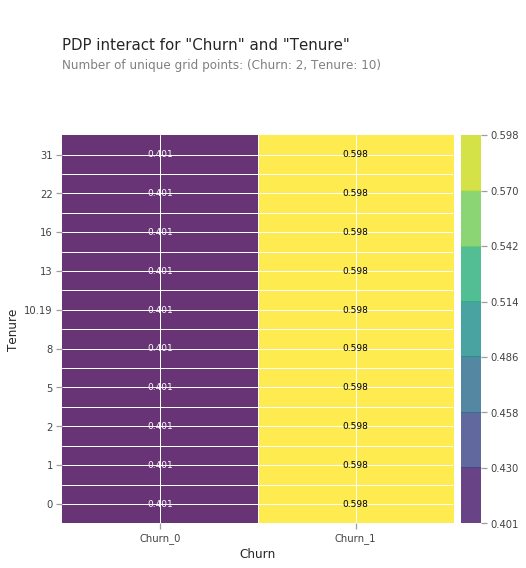

PDP plot은 0과 1인 타겟으로 이루어진 이 데이터에 적합하지 않은 것을 알 수 있음

> 🌙 결론

- 이커머스 회사 이탈 예정 고객을 예방하고자 데이터 분석 진행

- 타겟 : 이탈 플래그 (이탈하지 않은 고객 - 83%, 이탈한 고객 17%)

- 컴플레인에 따른 고객 이탈률 : 컴플레인을 건 쪽과 걸지 않은 쪽의 이탈률 차이가 큼  --> 컴플레인을 건 고객의 이탈률이 더 높음

- 고객 가입 기간이 적을수록 이탈률이 매우 크게 나타남

- 즉, 이탈률에 가장 큰 영향을 미치는 변수는 가입 기간과 컴플레인인 것을 알 수 있음

- 중복값 X, 결측치 각 변수 평균값으로 처리

- train data 80%, test data 20%

- 원핫인코딩 후 데이터 : 4504 행, 35 컬럼

- 기준모델 정확도 : 0.83 / 로지스틱 회귀 정확도 : 0.82 / 결정트리 정확도 : 0.87 / 랜덤 포레스트 정확도 : 0.87 / XGBoost 정확도 : 0.87

- 로지스틱 회귀 test score : 0.6

- 결정트리 test score : 0.65

- 랜덤 포레스트 test score : 0.65

- XGBoost --> 최적 하이퍼파라미터 찾기 위해 RandomSearchCV --> 데이터 수가 너무 불균형해서 그런가? Undersampling --> 데이터 수가 너무 감소되는 현상 발생하여 Oversampling

- 최종 XGBoost test score : 0.71

- permutation feature importance(순열 특성 중요도) : 1.Tenure / 2. Complain / 3. Number of address / 4. Cashback amount / 5. Day since last order / 6. Warehouse to home / 7. Satisfaction score

- PDP 모델은 0과 1로 이루어진 타겟 데이터와 맞지 않음

> ⭐ 이탈 예방 전략

- ✔ Tenure : 가입 기간이 짧은 고객(~2개월)은 그 이상 가입 고객보다 이탈 가능성이 더 높음

- 2개월 미만 고객에게 가입 환영 쿠폰을 지급하여 구매 유도 전략 (회사 유지 위해 최소 주문 금액, 최대 할인 금액 설정)


--------------------------------------------------------------------------------

- ✔ Complain : 컴플레인으로 인한 이탈률(31.67%)은 컴플레인을 걸지 않은 고객의 전체 이탈률(10.93%)보다 3배 높음 

- 컴플레인 마케팅 도입 : 컴플레인 고객을 매달 확인하여 고객의 불만 사항을 개선하고, 올바른 지적을 해준 고객 중 추첨을 통해 상품권을 증정하여 고객 충성도를 높이는 전략

--------------------------------------------------------------------------------

- ✔ Number of address : 주소를 입력하지 않은 고객은 그렇지 않은 고객보다 이탈 가능성이 더 높음

- 회원가입할 때 주소를 입력하게 유도하고, 로그인 하지 않은 고객은 이벤트를 미리보기만 가능하게(참여하지 못하게)하여 회원가입을 유도하는 전략

--------------------------------------------------------------------------------

- ✔ Cashback Amount : 지난 달 캐쉬백이 많이 쌓이지 않은 고객은 그렇지 않은 고객보다 이탈 가능성이 높음

- 핸드폰, 랩탑 등 가격대가 높은 인기 상품을 구매하면 10% 캐쉬백이 쌓이는 기간 한정 이벤트(ex. 새학기 기간) 통해 구매를 유도하고, 포인트를 평소보다 많이 쌓게 함으로써 회원 탈퇴를 방지하는 전략
